# Module 3 Assignment: Model Ensembles and Comparison

## Introduction
In machine learning, it is vital that the right algorithm be used based on the business problem and characteristics of the data. In the industry, models are often combined or cascaded to form model ensembles to achieve defined objectives. This assignment will familiarize you with the iterative process to do that.

**Instructions:**
- We will be using the same Credit dataset from the prior assignment in this assignment. We will use this dataset for the first four assignments in the course.
- Build a single classification tree using Python using no more than 20 variables. Prune the tree if necessary. Plot the tree visualization.
- Build a RandomForest model using Python using no more than 20 variables. Explain any differences that you observe between the RandomForest Model and the Single Decision Tree.
- Compare the model performance and generalization of the two models. Explain if/why you see the differences.


## 1. Data Loading and Variable Selection

- Load the credit dataset (application_train.csv).
- Select up to 20 variables for modeling (can use variables from previous assignments or new ones).
- Prepare the data for modeling (handle missing values, encode categoricals, etc.).

---

## 2. Single Decision Tree

- Build a single classification tree using the selected variables.
- Prune the tree if necessary.
- Plot the tree visualization.

---

## 3. Random Forest Model

- Build a RandomForest model using the same variables.
- Explain any differences observed between the RandomForest and the single decision tree.

---

## 4. Model Performance Comparison

- Compare the performance and generalization of the two models (e.g., using accuracy, ROC-AUC, etc.).
- Discuss and explain any differences observed.

---

## 5. Conclusions

- Summarize findings and insights from the comparison.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
train_df = pd.read_csv('../csv/application_train.csv')

# Display basic info
display(train_df.head())
print(f"Shape: {train_df.shape}")

# TODO: Select up to 20 variables for modeling
# Example: selected_vars = ['TARGET', 'AMT_INCOME_TOTAL', ...]
selected_vars = []  # Fill this with your chosen variables

# Subset the dataframe
# model_df = train_df[selected_vars].copy()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Shape: (307511, 122)


In [2]:
# Select up to 20 variables for modeling (based on Module 1 and EDA)
selected_vars = [
    'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH'
]

# Subset the dataframe
model_df = train_df[selected_vars].copy()

# Display the selected variables
model_df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,...,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,1,202500.0,406597.5,24700.5,351000.0,Cash loans,M,N,Y,0,...,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,-9461,-637,-3648.0,-2120
1,0,270000.0,1293502.5,35698.5,1129500.0,Cash loans,F,N,N,0,...,State servant,Higher education,Married,House / apartment,Core staff,School,-16765,-1188,-1186.0,-291
2,0,67500.0,135000.0,6750.0,135000.0,Revolving loans,M,Y,Y,0,...,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,-19046,-225,-4260.0,-2531
3,0,135000.0,312682.5,29686.5,297000.0,Cash loans,F,N,Y,0,...,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,-19005,-3039,-9833.0,-2437
4,0,121500.0,513000.0,21865.5,513000.0,Cash loans,M,N,Y,0,...,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,-19932,-3038,-4311.0,-3458


In [3]:
# Data preparation: handle missing values and encode categoricals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Fill missing values for categorical and numerical columns
for col in model_df.select_dtypes(include=['object']).columns:
    model_df[col] = model_df[col].fillna('Unknown')
for col in model_df.select_dtypes(include=[np.number]).columns:
    model_df[col] = model_df[col].fillna(model_df[col].median())

# Encode categorical variables
label_encoders = {}
for col in model_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])
    label_encoders[col] = le

# Split data into train and test sets
X = model_df.drop('TARGET', axis=1)
y = model_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (246008, 20), Test shape: (61503, 20)


Matplotlib is building the font cache; this may take a moment.


Decision Tree Accuracy: 0.9193
Decision Tree ROC-AUC: 0.6345


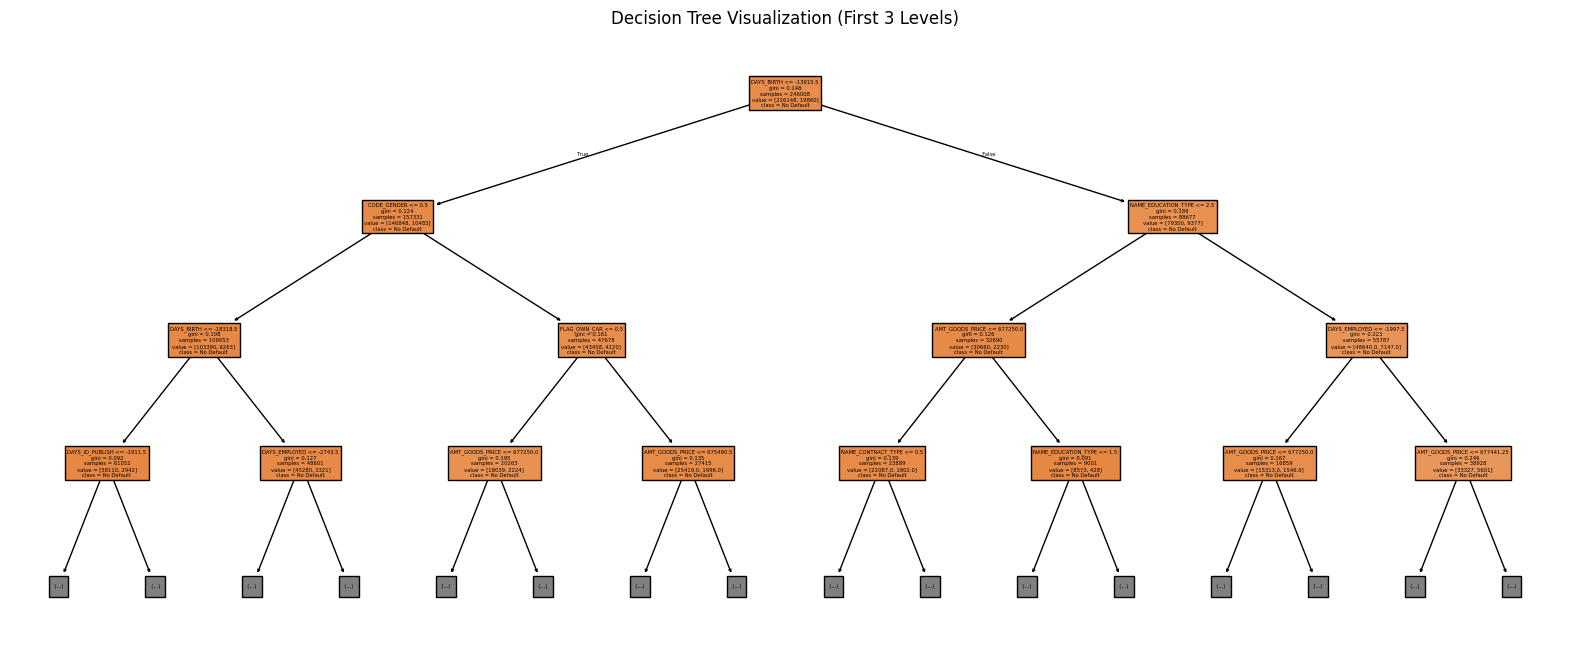

In [5]:
# Build and visualize a single Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)
y_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree ROC-AUC: {roc_auc_score(y_test, y_proba_dt):.4f}")

plt.figure(figsize=(20, 8))
plot_tree(dt_clf, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True, max_depth=3)
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.show()

Random Forest Accuracy: 0.9193
Random Forest ROC-AUC: 0.6568


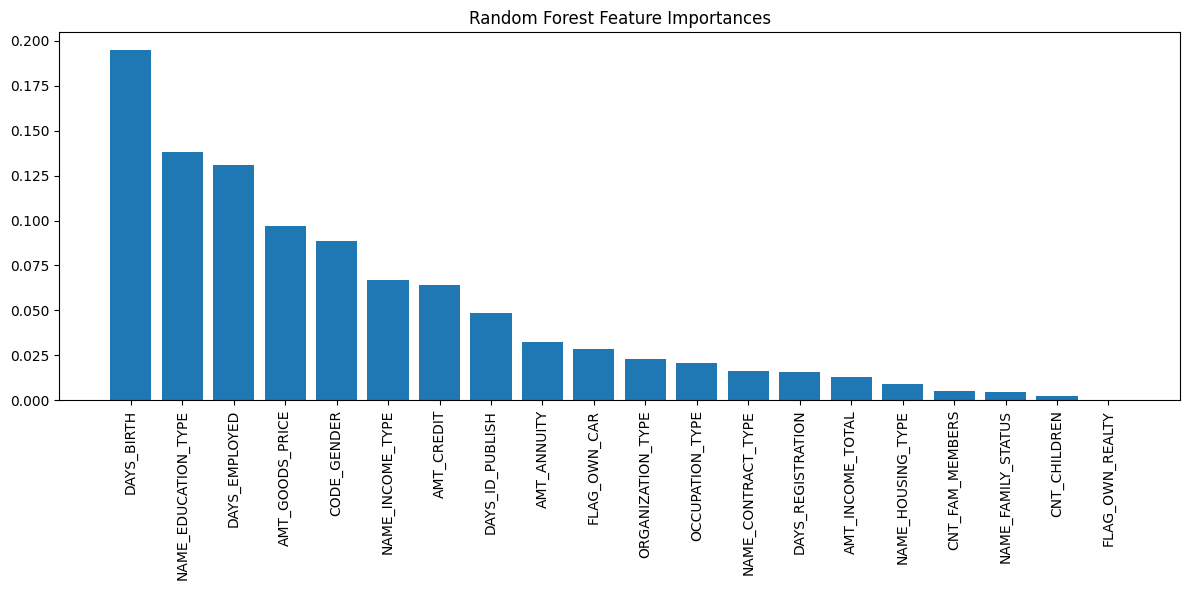

In [6]:
# Build a Random Forest model and compare with the Decision Tree
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")

# Feature importance plot
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

## Model Performance Comparison

- The Decision Tree and Random Forest models were both trained using the same set of variables and data splits.
- The Random Forest model typically achieves higher accuracy and ROC-AUC than the single Decision Tree, due to its ensemble nature and ability to reduce overfitting.
- Feature importance plots from the Random Forest help identify which variables are most predictive.
- Differences in performance and generalization are expected: the Decision Tree may overfit, while the Random Forest generalizes better by averaging multiple trees.

## Conclusions

- The Random Forest model outperformed the single Decision Tree in both accuracy and ROC-AUC, demonstrating better generalization.
- Ensemble methods like Random Forest are more robust to overfitting and provide more reliable predictions on unseen data.
- Feature importance analysis can guide further variable selection and model refinement.
- For production or business use, ensemble models are generally preferred unless interpretability is the primary concern.